# [TWD] Praca Domowa nr8
## Kacper Kurowski

## Problematyczny wykres

Poniższy wykres znalazłem na stronie [onet.pl](https://www.onet.pl/styl-zycia/onetkobieta/szczepionka-na-koronawirusa-ksiadz-zastanawia-sie-czy-przy-jej-produkcji-nie-uzyto/mgs3817,2b83378a) (dostęp 02.12.2020). Przedstawia on wyniki ankiet dotyczącej opinii Polaków wobec działalności Kościoła katolickiego w Polsce.

![Wyniki ankiety](ocena_kosciola_katolickiego_przyciete.webp)

Jest on częścią grafiki złożonej z wielu wykresów. 
Ma wiele wad, które utrudniają jego interpretację:
* Nie jest jasne czemu odpowiadają punkty na osi $x$ - raczej są to punkty czasowe, ale w różnych latach jest ich więcej niż w innych, czyniąc te lata optycznie dłuższymi; nie wiadomo, kiedy zostały wykonane ankiety.
* Nie jest jasne, czemu odpowiada wysokość na osi pionowej - z jednej strony kolory sugerują, że powinno się traktować wysokość "paska" danego koloru w danym punkcie czasowym jako udział danej opinii. Z drugiej, podane są pewne liczby powyżej paska danego koloru, które... prawdopodobnie są faktycznymi wartościami. Jak wiemy z <ins>reszty grafiki</ins> (<q>... wśród badanych wciąż przeważa opinia, ze jego sytuacja w Polsce jest dobra.</q>), druga z interpretacji jest tą prawidłową.
* Tylko najwyższa z liczb na skali pionowej (60) ma dopisany procent z prawej strony - gdyby nie ona, nie byłoby jasne czy wartości oznaczają przykładowo liczbę odpowiedzi danego typu, czy udział procentowy danych odpowiedzi.
* Liczby powyżej pasków purpurawego koloru stapiają się nieco z tłem utrudniających ich odczytywanie.
* Żadna para wartości nie dodaje się do stu... jak było wspomniane powyżej, interpretacja wartości jako procent jest sugerowana, więc gdzie podziały się pozostałe procenty? Prawdopodobnie brakujące wartości biorą się z odpowiedzi "Trudno powiedzieć", która już jest wymieniona na pozostałych wykresach ze wspomnianej strony.
* Poziome kreski mające ułatwić rozpoznawanie wysokości są niemalże niewidoczne i raczej powodują efekt z pamiątki znad morza z kolorowym piaskiem za szybką niż dają pomoc w odczytywaniu.

## Próba poprawienia wykresu

Przede wszystkim konieczne jest ukazanie wartości procentowych na wykresie nie poprzez wysokość od zera a wysokość chociażby słupka jednego koloru. Zdecydowałem sie również wybrać średnią z punktów czasowych odpowiadajacych temu samemu roku, gdyż nie wiadomo, kiedy ankiety były tworzone, a jednak jakąś informacje z tamtego okresu chcemy mieć. Przede wszystkim nie chcemy sztucznie rozszerzać danego okresu.
Dodałem również odpowiedź <q>Trudno powiedzieć</q>, która zdaje się odpowiadać za brakujące procenty z wykresu.

### Wczytanie danych

In [1]:
lata = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
liczba_lat = len(lata)
dobra_ocena = [60, (57+59+56)/3, (62+57+58)/3, (62+55+53)/3, (55+55)/2, (52+61)/2, (54+55)/2, (57+48+53+48)/4]
zla_ocena =   [29, (29+28+32)/3, (29+34+27)/3, (28+32+33)/3, (32+31)/2, (35+29)/2, (32+33)/2, (32+40+34+38)/4]
trudno_powiedziec = [100 - dobra_ocena[i] - zla_ocena[i] for i in range( liczba_lat)]



import pandas as pd 

raw_data = {
    "Dobrze": dobra_ocena,
    "Trudno powiedzieć": trudno_powiedziec, 
    "Źle": zla_ocena
}
df = pd.DataFrame( raw_data)

### Tworzenie wykresu

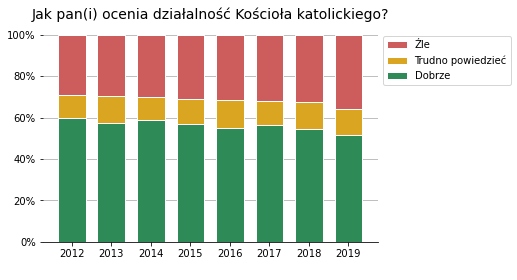

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
barWidth = 0.7

ax = plt.figure();
host = host_subplot(111)

# Create green Bars
p1 = plt.bar(lata, dobra_ocena,
             color='seagreen', edgecolor='white',
             width=barWidth)
# Create orange Bars
p2 = plt.bar(lata, trudno_powiedziec, bottom=dobra_ocena,
             color='goldenrod', edgecolor='white',
             width=barWidth)
# Create reddish Bars
p3 = plt.bar(lata, zla_ocena, bottom=[i+j for i,j in zip(dobra_ocena, trudno_powiedziec)],
             color='indianred', edgecolor='white',
             width=barWidth)

# Custom x axis
plt.xticks(lata)
plt.xlabel("rok")
 
plt.title('Jak pan(i) ocenia działalność Kościoła katolickiego?',
         fontsize = 14)

from matplotlib.font_manager import FontProperties


plt.legend((p3[0], p2[0], p1[0]), ('Źle','Trudno powiedzieć','Dobrze'),
           loc='lower left',
           bbox_to_anchor=(1, 0.7, 0.5, 0.5))

plt.rc('legend',**{'fontsize':10})

import matplotlib.ticker as ticker

plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())

plt.box(True)

host.spines['top'].set_visible(False)
host.spines['right'].set_visible(False)
host.spines['left'].set_visible(False)

host.set_axisbelow(True)

plt.grid(False, axis = "x")
plt.grid(axis = "y")

plt.xlabel(" ")


# Show graphic
plt.show()

Utworzony wykres jest znacznie prostszy w odczytaniu niż poprzedni. Łatwo zauważyć, że procent Polaków dobrze oceniających działania kościoła się zmniejsza w czasie, z kolei tych, którzy źle je oceniają jest coraz więcej.  Nie zawiera również niejasności co do większej liczby punktów czasowych w pewnych latach względem innych.

Poziome linie zostały pozostawione, gdyż pomagają one w porównywaniu wysokości słupków szczególnie dla późniejszych lat.